# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fort st. john
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | badger
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | charters towers
Processing Record 7 of Set 1 | invercargill
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | posto fiscal rolim de moura
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | hawaiian paradise park
Processing Record 12 of Set 1 | wailua homesteads
Processing Record 13 of Set 1 | isafjordur
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | mount isa
Processing Record 16 of Set 1 | coquimbo
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | olonkinbyen
Processing Record 19 of Set 1 | juhaynah
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fort st. john,56.2499,-120.8529,58.89,51,75,3.44,CA,1696877855
1,grytviken,-54.2811,-36.5092,35.60,81,4,9.40,GS,1696877742
2,badger,64.8000,-147.5333,28.27,83,0,0.00,US,1696877756
3,albany,42.6001,-73.9662,58.59,59,99,1.01,US,1696877631
4,blackmans bay,-43.0167,147.3167,44.53,88,60,4.03,AU,1696877740


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fort st. john,56.2499,-120.8529,58.89,51,75,3.44,CA,1696877855
1,grytviken,-54.2811,-36.5092,35.60,81,4,9.40,GS,1696877742
2,badger,64.8000,-147.5333,28.27,83,0,0.00,US,1696877756
3,albany,42.6001,-73.9662,58.59,59,99,1.01,US,1696877631
4,blackmans bay,-43.0167,147.3167,44.53,88,60,4.03,AU,1696877740


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

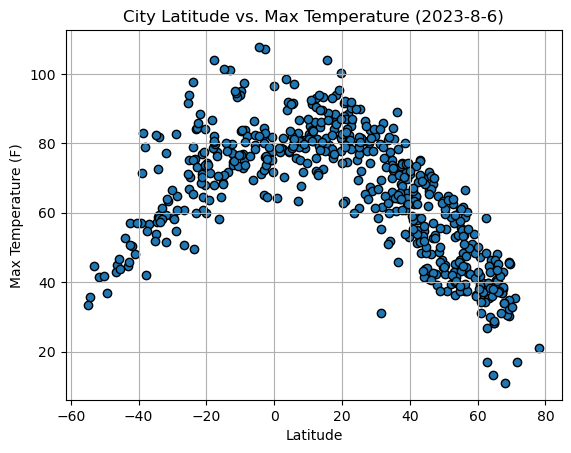

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (2023-8-6)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

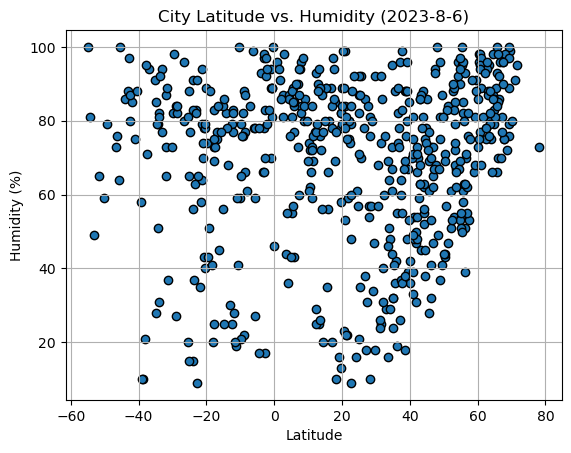

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-8-6)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

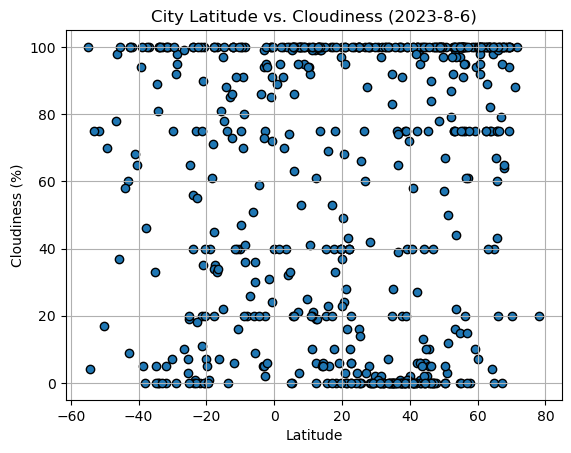

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-8-6)")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

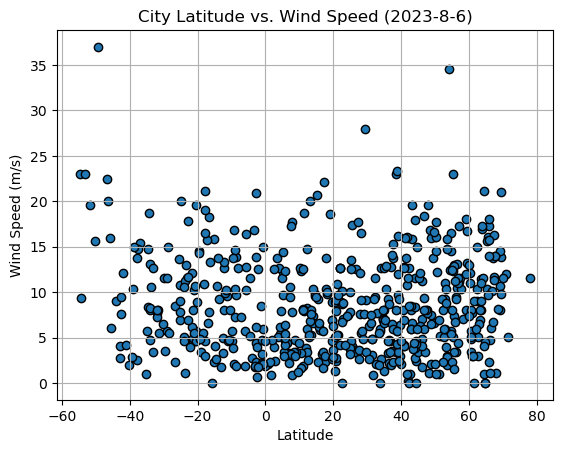

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-8-6)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def lin_reg_plot(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    print(f"The r-value is: {rvalue}")
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")

def annotation(line_eq, x, y):
    plt.annotate(line_eq, (x, y), fontsize=15, color="red")

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fort st. john,56.2499,-120.8529,58.89,51,75,3.44,CA,1696877855
2,badger,64.8000,-147.5333,28.27,83,0,0.00,US,1696877756
3,albany,42.6001,-73.9662,58.59,59,99,1.01,US,1696877631
10,hawaiian paradise park,19.5933,-154.9731,81.88,78,40,4.61,US,1696877762
11,wailua homesteads,22.0669,-159.3780,81.03,80,40,12.66,US,1696877761


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,35.60,81,4,9.40,GS,1696877742
4,blackmans bay,-43.0167,147.3167,44.53,88,60,4.03,AU,1696877740
5,charters towers,-20.1000,146.2667,59.99,89,7,8.90,AU,1696877856
6,invercargill,-46.4000,168.3500,45.01,76,98,20.00,NZ,1696877748
7,port-aux-francais,-49.3500,70.2167,36.84,79,70,37.00,TF,1696877740


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.857550928788423


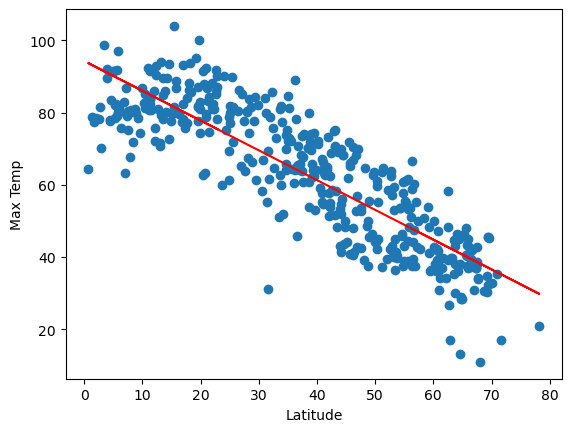

In [20]:
# Linear regression on Northern Hemisphere
plotting = lin_reg_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
annotation(plotting, 10, 40)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.show()

The r-value is: 0.7004853066050489


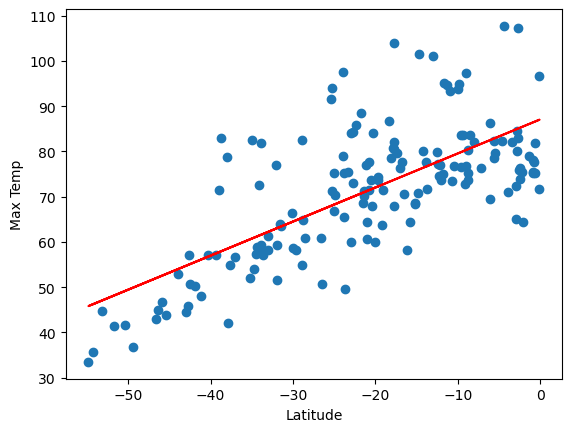

In [21]:
# Linear regression on Southern Hemisphere
plotting = lin_reg_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
annotation(plotting, -20, 30)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.15040110336709947


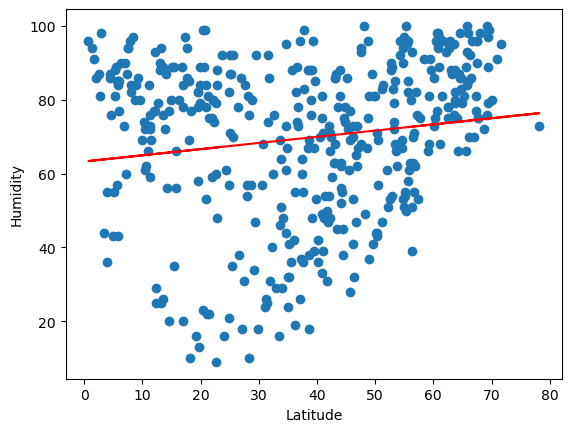

In [22]:
# Northern Hemisphere
plotting = lin_reg_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
annotation(plotting, 40, 10)
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.show()

The r-value is: -0.017680284226669844


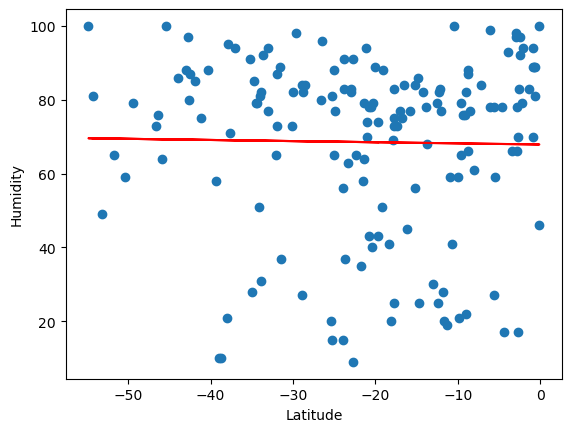

In [23]:
# Southern Hemisphere
plotting = lin_reg_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
annotation(plotting, -50, 20)
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1558867766198295


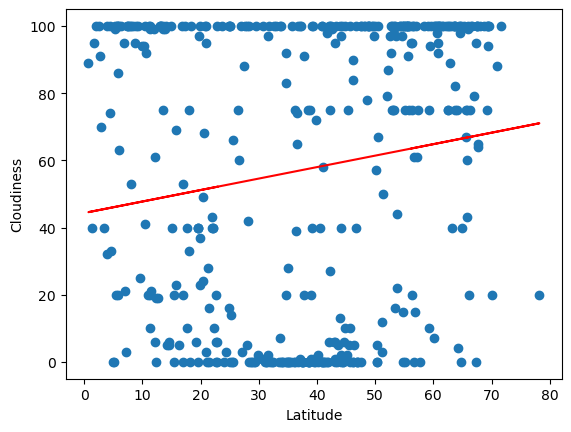

In [24]:
# Northern Hemisphere
plotting = lin_reg_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
annotation(plotting, 40, 15)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.show()

The r-value is: -0.01978570542291988


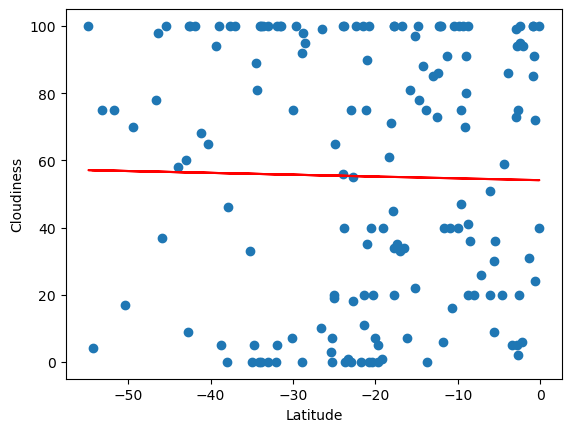

In [25]:
# Southern Hemisphere
plotting = lin_reg_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
annotation(plotting, -50, 20)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.17658319327566815


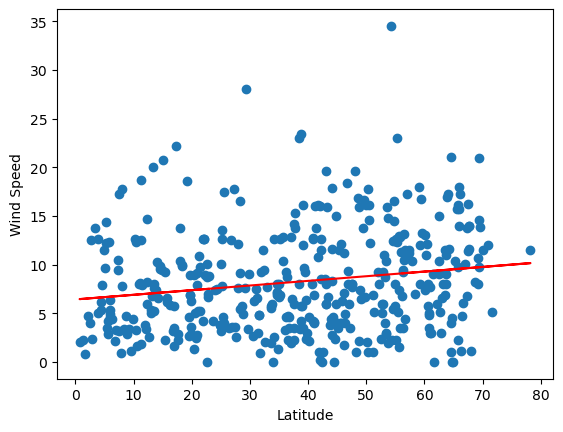

In [26]:
# Northern Hemisphere
plotting = lin_reg_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
annotation(plotting, 10, 13)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.show()

The r-value is: -0.29705354468538614


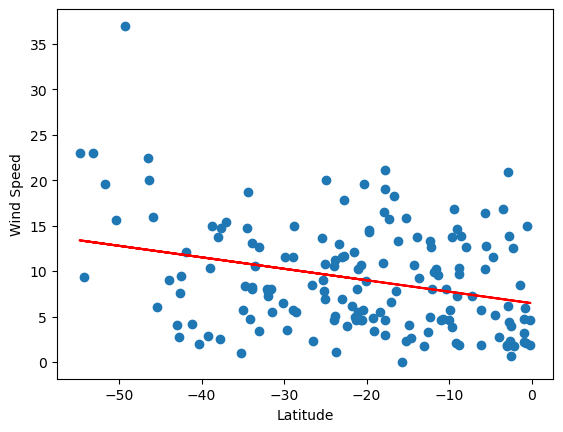

In [27]:
# Southern Hemisphere
plotting = lin_reg_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
annotation(plotting, -50, 12)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE